<a href="https://colab.research.google.com/github/Harshbhatt2409/Mining-Big-Data-/blob/main/%3Ca1872953%3E_%3CHarsh_Alpesh_Bhatt%3E_%3C23%3E_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3a: Individual Code for Recommendation System

### \<a1872953>\<Harsh Alpesh Bhatt>\<23>


**The task of this assignment is to practice of using association rule mining and recommender system methods and to apply pattern mining and recommendation system methods to solve a practical problem.**

Our team has mutually agreed on doing one code part each, i.e. the code that takes data and generate recommendations in the form of patterns is taken by Pranshu, the second part where we take data and generate recommendations is taken by Ravi and the final part where we take Patterns and generate recommendations is taken by me. We have done this kind of split so that each person can contribute to the code equally and the final report and the intersections of the code we do together as a team.



1.   Data-> patterns -> Pranshu
2.   Data-> recommendations -> Ravi
3.   Patterns -> recommendations -> Harsh







**As discussed and agreed by the group my task is the job 2 input 2, i.e., in this code I will take patterns as input and generate appropriate recommendations**

The section 1 of this code is the code of my teammate. In this section we basically take data as input and using FpGrowth convert it to patterns. I have included his code in the file as i am taking the patterns generated from his code as my input.

This is a colab file and the link to the code is as: https://colab.research.google.com/drive/17HhstMI8LVqqPCUzxN54I2BKZ0IcIq-P?usp=sharing

##1. Part where we convert Data to Pattern, Teammate's part

In [ ]:
! pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ipython==7.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 7.10.0 which is incompatible.


In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas
import datetime
import mlxtend.preprocessing
from datetime import datetime
import mlxtend.frequent_patterns

In [ ]:
def pandas_column_to_datetime(dataframe: pandas.DataFrame, column_name: str, datetime_format_str: str) -> pandas.DataFrame:
    dataframe[column_name] = dataframe[column_name].apply(lambda date_col: datetime.strptime(date_col, datetime_format_str))
    return dataframe

def drop_column_list(dataframe: pandas.DataFrame, column_name_list: list[str]) -> pandas.DataFrame:
    for column_name in column_name_list:
        dataframe = dataframe.drop(column_name, axis = 1).dropna()
    return dataframe

def aggrigrate_cart_dataframe(dataframe: pandas.DataFrame) -> pandas.DataFrame:
    cart_dataframe = dataframe.sort_values(by = ["Date", "Member_number"]).groupby(by = ["Date", "Member_number"]).aggregate({"itemDescription": lambda item: ", ".join(item)})
    cart_dataframe["itemDescription"] = cart_dataframe["itemDescription"].apply(lambda cart_csv: cart_csv.split(", "))
    return cart_dataframe

dataset_train, dataset_test = pandas.read_csv("./Groceries data train.csv"), pandas.read_csv("./Groceries data test.csv")
dataset_train, dataset_test = pandas_column_to_datetime(dataset_train, "Date", "%d/%m/%Y"), pandas_column_to_datetime(dataset_test, "Date", "%d/%m/%Y")
dataset_train, dataset_test = drop_column_list(dataset_train, ["year", "month", "day", "day_of_week"]), drop_column_list(dataset_test, ["year", "month", "day", "day_of_week"])

cart_dataframe_train, cart_dataframe_test = aggrigrate_cart_dataframe(dataset_train), aggrigrate_cart_dataframe(dataset_test)
cart_dataframe_train.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription
Date       Member_number                                          
2014-01-01 1249                             [coffee, citrus fruit]
           1381                                             [curd]
           1440                                           [yogurt]
           1659           [frozen vegetables, specialty chocolate]
           1789                          [candles, hamburger meat]

In [ ]:
def perform_one_hot_encoding(dataframe: pandas.DataFrame) -> tuple[mlxtend.preprocessing.TransactionEncoder(), list[str], pandas.DataFrame]:
    transaction_encoder = mlxtend.preprocessing.TransactionEncoder().fit(dataframe)
    return transaction_encoder, transaction_encoder.columns_, pandas.DataFrame(transaction_encoder.transform(cart_dataframe_train["itemDescription"]), columns = transaction_encoder.columns_)

transaction_encoder, item_list, one_hot_encoded_cart_dataframe_train = perform_one_hot_encoding(cart_dataframe_train["itemDescription"])
one_hot_encoded_cart_dataframe_train.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from abc import abstractmethod

class FrequentPattern:
    @abstractmethod
    def calculate_frequent_itemset(self, dataframe: pandas.DataFrame, min_support: float, verbose: bool):
        pass

class FPGrowth(FrequentPattern):
    def calculate_frequent_itemset(self, dataframe: pandas.DataFrame, min_support: float, verbose: bool) -> pandas.DataFrame:
        return mlxtend.frequent_patterns.fpgrowth(df = dataframe, min_support = min_support, use_colnames = True, max_len = None, verbose = 1 if verbose else 0 )

def calculate_frequent_itemset_for_encoded_cart_dataframe(frequent_pattern_algorithm: FrequentPattern, dataframe: pandas.DataFrame, min_support: float, verbose: bool) -> pandas.DataFrame:
    if((0 <= min_support) & (min_support <= 1)):
        return frequent_pattern_algorithm.calculate_frequent_itemset(dataframe, min_support, verbose)

def calculate_association_rule_for_encoded_cart_dataframe(dataframe: pandas.DataFrame, metric: str, min_threshold: float) -> pandas.DataFrame:
    association_rule_for_encoded_cart_dataframe = mlxtend.frequent_patterns.association_rules(df = dataframe, metric = metric, min_threshold = min_threshold)
    association_rule_for_encoded_cart_dataframe = association_rule_for_encoded_cart_dataframe.loc[association_rule_for_encoded_cart_dataframe["leverage"] > 0].sort_values(by = ["conviction"], ascending = True)
    association_rule_for_encoded_cart_dataframe["antecedents"] = association_rule_for_encoded_cart_dataframe["antecedents"].apply(lambda antecedents: ", ".join(list(antecedents)))
    association_rule_for_encoded_cart_dataframe["consequents"] = association_rule_for_encoded_cart_dataframe["consequents"].apply(lambda consequents: ", ".join(list(consequents)))
    return association_rule_for_encoded_cart_dataframe

def calculate_frequent_itemset_association_rule(frequent_pattern_algorithm: FrequentPattern, one_hot_encoded_cart_dataframe: pandas.DataFrame, min_support: float, verbose: bool, metric: str, min_threshold: float) -> tuple[pandas.DataFrame, pandas.DataFrame]:
    frequent_itemset_dataframe = calculate_frequent_itemset_for_encoded_cart_dataframe(frequent_pattern_algorithm, one_hot_encoded_cart_dataframe, min_support, verbose)
    association_rule_for_encoded_cart_dataframe = calculate_association_rule_for_encoded_cart_dataframe(frequent_itemset_dataframe, metric, min_threshold)
    return frequent_itemset_dataframe, association_rule_for_encoded_cart_dataframe

def get_item_prediction(rules: pandas.DataFrame, item: str) -> list[str]:
    return list(rules.loc[rules["antecedents"] == item].sort_values(by = ["lift"], ascending = False)["consequents"])

def get_item_list_prediction(rules: pandas.DataFrame, item_list: list[str]) -> list[str]:
    result = set([predicted_item for item in item_list for predicted_item in get_item_prediction(rules, item)])
    return result

def get_cart_dataframe_train_actual_predict(dataframe_train: pandas.DataFrame, dataframe_test: pandas.DataFrame) -> pandas.DataFrame:
    cart_dataframe = dataframe_train.join(dataframe_test, lsuffix = "Train", rsuffix = "Test", on = ["Date", "Member_number"]).fillna(0)
    cart_dataframe["itemDescriptionTest_length"] = cart_dataframe["itemDescriptionTest"].apply(lambda itemDescriptionTest: len(itemDescriptionTest) if itemDescriptionTest != 0 else 0)
    cart_dataframe = cart_dataframe.loc[cart_dataframe["itemDescriptionTest_length"] != 0].sort_values(by = ["itemDescriptionTest_length"], ascending = False)
    cart_dataframe["itemDescriptionTest"] = cart_dataframe["itemDescriptionTest"].apply(lambda itemDescriptionTest: set(itemDescriptionTest))
    cart_dataframe["itemDescriptionPredict"] = cart_dataframe["itemDescriptionTrain"].apply(lambda itemDescriptionTrain: get_item_list_prediction(fp_growth_association_rules_datafrom_train, itemDescriptionTrain))
    return cart_dataframe[["itemDescriptionTrain", "itemDescriptionTest", "itemDescriptionPredict"]]


MIN_SUPPORT = 0.001
VERBOSE = False
METRIC = "confidence"
MIN_THRESHOLD = 0

fpgrowth_frequent_itemset_dataframe_train, fp_growth_association_rules_datafrom_train = calculate_frequent_itemset_association_rule(FPGrowth(), one_hot_encoded_cart_dataframe_train, MIN_SUPPORT, VERBOSE, METRIC, MIN_THRESHOLD)
cart_dataframe = get_cart_dataframe_train_actual_predict(cart_dataframe_train, cart_dataframe_test)
cart_dataframe


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescriptionTrain  \
Date       Member_number                                                      
2015-09-29 2510                               [whole milk, cling film/bags]   
2015-04-24 1290                       [other vegetables, yogurt, margarine]   
2015-07-23 2051                                       [beverages, prosecco]   
2015-05-21 2972           [other vegetables, canned beer, house keeping ...   
2015-01-22 2081                                               [butter milk]   
...                                                                     ...   
2014-09-16 4866                                                   [sausage]   
           3782                                                [newspapers]   
           3164                                             [shopping bags]   
           2746                                               [salty snack]   
2015-12-30 4565                                               [canned beer]   

                                                        itemDescriptionTest  \
Date       Member_number                                                      
2015-09-29 2510           {frozen vegetables, margarine, house keeping p...   
2015-04-24 1290           {whole milk, misc. beverages, sausage, frozen ...   
2015-07-23 2051           {fruit/vegetable juice, soda, ice cream, root ...   
2015-05-21 2972                   {whole milk, UHT-milk, pip fruit, coffee}   
2015-01-22 2081           {UHT-milk, citrus fruit, spices, tropical frui...   
...                                                                     ...   
2014-09-16 4866                                          {other vegetables}   
           3782                                             {domestic eggs}   
           3164                                                   {dessert}   
           2746                                           {root vegetables}   
2015-12-30 4565                                               {canned beer}   

                                                     itemDescriptionPredict  
Date       Member_number                                                     
2015-09-29 2510                                    {oil, herbs, candy, ham}  
2015-04-24 1290           {citrus fruit, grapes, soda, pip fruit, butter...  
2015-07-23 2051                                                          {}  
2015-05-21 2972                          {brown bread, frankfurter, grapes}  
2015-01-22 2081                                                          {}  
...                                                                     ...  
2014-09-16 4866           {domestic eggs, frozen vegetables, curd, yogur...  
           3782                                                    {butter}  
           3164                                 {soda, domestic eggs, curd}  
           2746                                                {rolls/buns}  
2015-12-30 4565                                               {brown bread}  

[7711 rows x 3 columns]

In [ ]:
fp_growth_association_rules_datafrom_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
236,citrus fruit,butter,0.039781,0.027120,0.001079,0.027125,1.000163,1.759490e-07,1.000005,0.000170
237,butter,citrus fruit,0.027120,0.039781,0.001079,0.039788,1.000163,1.759490e-07,1.000007,0.000168
370,rolls/buns,waffles,0.083519,0.013740,0.001151,0.013781,1.002999,3.441356e-06,1.000042,0.003262
364,whole milk,candy,0.118049,0.010215,0.001223,0.010360,1.014140,1.705153e-05,1.000146,0.015809
416,soda,margarine,0.074095,0.025034,0.001870,0.025243,1.008331,1.545246e-05,1.000214,0.008923
...,...,...,...,...,...,...,...,...,...,...
498,UHT-milk,tropical fruit,0.015035,0.048414,0.001007,0.066986,1.383607,2.792259e-04,1.019905,0.281483
505,ham,whole milk,0.013452,0.118049,0.001870,0.139037,1.177794,2.823412e-04,1.024378,0.153013
302,napkins,pastry,0.017840,0.039781,0.001151,0.064516,1.621770,4.412801e-04,1.026441,0.390354
515,grapes,soda,0.010503,0.074095,0.001151,0.109589,1.479026,3.727842e-04,1.039862,0.327317


##2. Now we move to my part, i.e. using the patterns to generate recommendations

In [ ]:
df = fp_growth_association_rules_datafrom_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
236,citrus fruit,butter,0.039781,0.027120,0.001079,0.027125,1.000163,1.759490e-07,1.000005,0.000170
237,butter,citrus fruit,0.027120,0.039781,0.001079,0.039788,1.000163,1.759490e-07,1.000007,0.000168
370,rolls/buns,waffles,0.083519,0.013740,0.001151,0.013781,1.002999,3.441356e-06,1.000042,0.003262
364,whole milk,candy,0.118049,0.010215,0.001223,0.010360,1.014140,1.705153e-05,1.000146,0.015809
416,soda,margarine,0.074095,0.025034,0.001870,0.025243,1.008331,1.545246e-05,1.000214,0.008923
...,...,...,...,...,...,...,...,...,...,...
498,UHT-milk,tropical fruit,0.015035,0.048414,0.001007,0.066986,1.383607,2.792259e-04,1.019905,0.281483
505,ham,whole milk,0.013452,0.118049,0.001870,0.139037,1.177794,2.823412e-04,1.024378,0.153013
302,napkins,pastry,0.017840,0.039781,0.001151,0.064516,1.621770,4.412801e-04,1.026441,0.390354
515,grapes,soda,0.010503,0.074095,0.001151,0.109589,1.479026,3.727842e-04,1.039862,0.327317


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
236,citrus fruit,butter,0.039781,0.027120,0.001079,0.027125,1.000163,1.759490e-07,1.000005,0.000170
237,butter,citrus fruit,0.027120,0.039781,0.001079,0.039788,1.000163,1.759490e-07,1.000007,0.000168
370,rolls/buns,waffles,0.083519,0.013740,0.001151,0.013781,1.002999,3.441356e-06,1.000042,0.003262
364,whole milk,candy,0.118049,0.010215,0.001223,0.010360,1.014140,1.705153e-05,1.000146,0.015809
416,soda,margarine,0.074095,0.025034,0.001870,0.025243,1.008331,1.545246e-05,1.000214,0.008923


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(94, 10)

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 236 to 413
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         94 non-null     object 
 1   consequents         94 non-null     object 
 2   antecedent support  94 non-null     float64
 3   consequent support  94 non-null     float64
 4   support             94 non-null     float64
 5   confidence          94 non-null     float64
 6   lift                94 non-null     float64
 7   leverage            94 non-null     float64
 8   conviction          94 non-null     float64
 9   zhangs_metric       94 non-null     float64
dtypes: float64(8), object(2)
memory usage: 8.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,94.000000
mean,0.041278,0.041278,0.001442,0.047987,1.186168,1.810873e-04,1.007206,0.145362
std,0.026924,0.026924,0.000609,0.030349,0.180753,1.346656e-04,0.009127,0.117629
min,0.008057,0.008057,0.001007,0.008531,1.000163,1.759490e-07,1.000005,0.000168
25%,0.026041,0.026041,0.001079,0.028952,1.042291,6.666268e-05,1.001812,0.042262
50%,0.029566,0.029566,0.001151,0.039631,1.121835,1.660079e-04,1.004609,0.112761
75%,0.046651,0.046651,0.001439,0.055499,1.234149,2.941635e-04,1.010411,0.194178
max,0.118049,0.118049,0.003237,0.140351,1.680463,4.660682e-04,1.066110,0.441827


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents           0
consequents           0
antecedent support    0
consequent support    0
support               0
confidence            0
lift                  0
leverage              0
conviction            0
zhangs_metric         0
dtype: int64

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['antecedents', 'consequents']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 8 numerical variables

The numerical variables are :

 ['antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1600x1800 with 0 Axes>

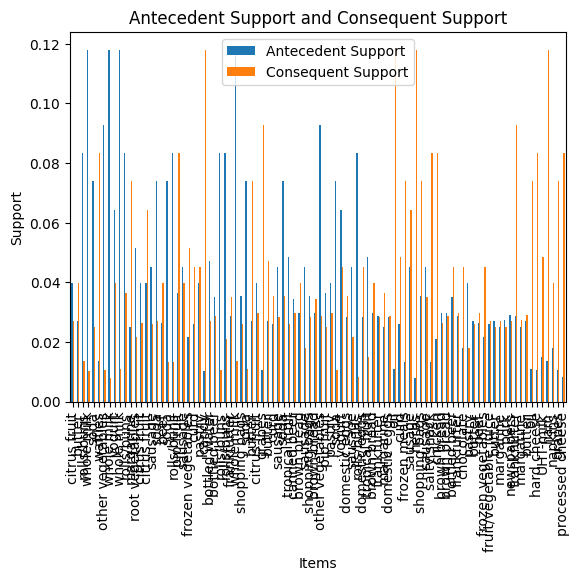

In [ ]:
import matplotlib.pyplot as plt

# Select the columns of interest
support_df = df[['antecedents', 'antecedent support', 'consequent support']]

# Plot the bar chart
plt.figure(figsize=(16, 18))
support_df.set_index('antecedents').plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Support')
plt.title('Antecedent Support and Consequent Support')
plt.legend(['Antecedent Support', 'Consequent Support'])
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


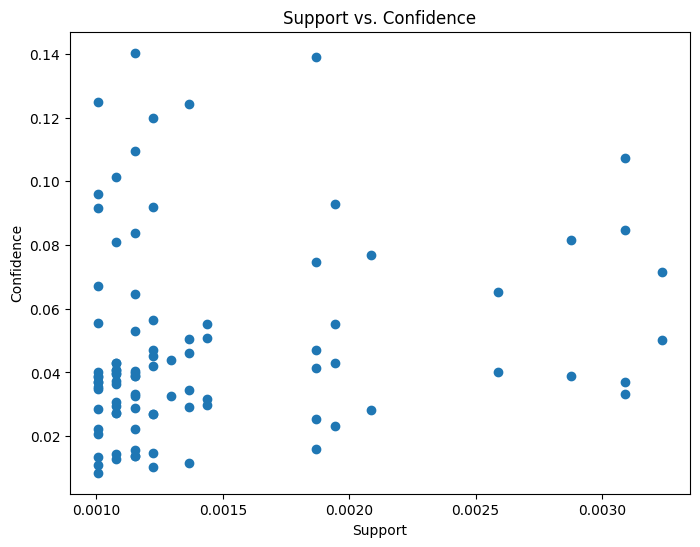

In [ ]:
import matplotlib.pyplot as plt

# Select the columns of interest
scatter_df = df[['support', 'confidence']]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_df['support'], scatter_df['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


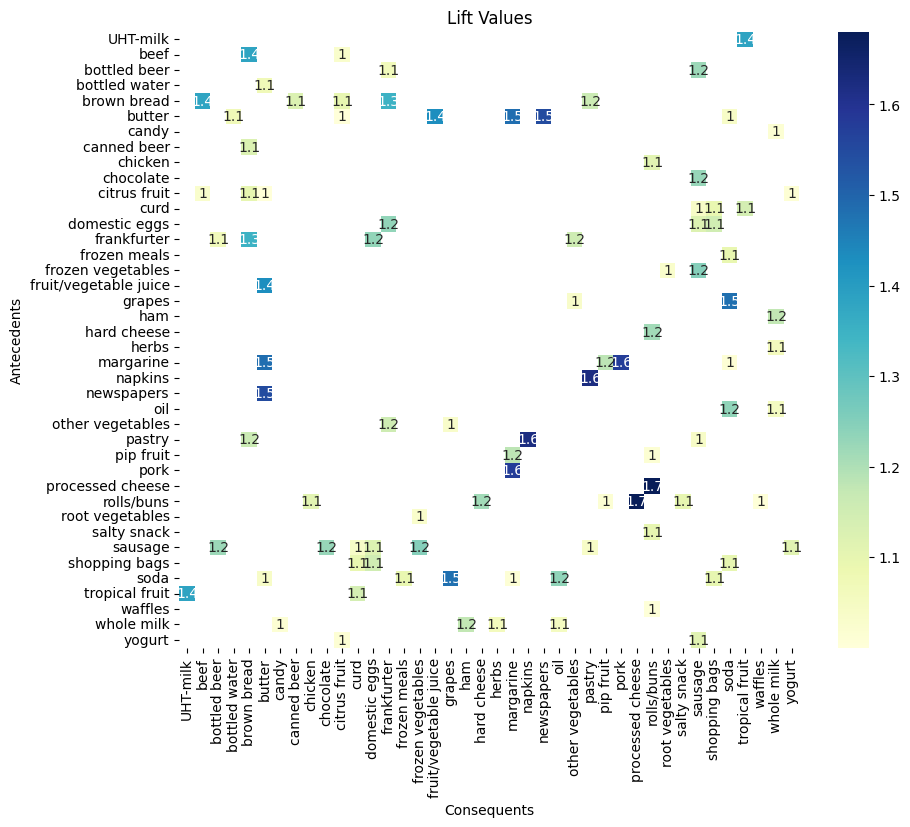

In [ ]:
import seaborn as sns

# Create a pivot table of lift values
lift_pivot = df.pivot(index='antecedents', columns='consequents', values='lift')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lift_pivot, annot=True, cmap='YlGnBu')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.title('Lift Values')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


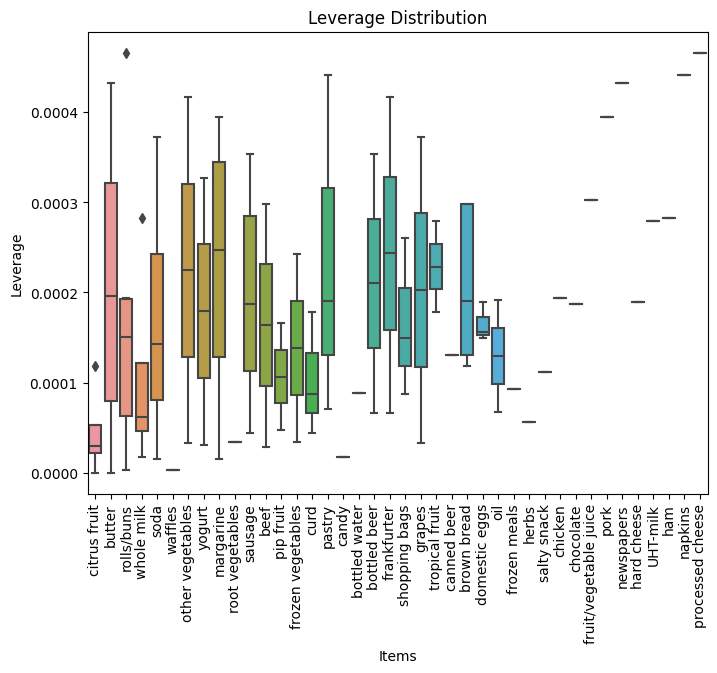

In [ ]:
import matplotlib.pyplot as plt

# Select the columns of interest
leverage_df = df[['antecedents', 'leverage']]

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='antecedents', y='leverage', data=leverage_df)
plt.xlabel('Items')
plt.ylabel('Leverage')
plt.title('Leverage Distribution')
plt.xticks(rotation=90)
plt.show()


From the above, we can say that the patterns that we take as input has 94 rows and 10 columns. The dataset doesn't have any null values. It has 2 categorical values 'antecedents', 'consequents' and 8 float64 values 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric'.

#3. Collaborative Filtering

**In recommendation systems, a technique that takes patterns as input and generates recommendations as output is Collaborative Fitering.**

This technique relies on simple assumption that people have agreed on the past will tend to agree in future. It analyses patterns or preferences from multiple users to make recommendations.

There are two main type of Collaborative Filtering Techniques:
1. User Based Collaborative Filtering: This identifies similar users based on past preferences and generates recommendations for a target user.

2. Item Based Collaborative Filtering: This identifies similar items based on the preferences of users and generates recommendations for a target user considering the items similar to the ones they have purchased.

From the given dataset and the task assigned to us we will use item based collaborative filtering.

We will use cosine similarity as the function to test similarity of items and then create a matrix of the similarities and items.

In the below code we are generating recommendations for specific item and the code below that we will generate recommendations for the given test dataset.


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
# Create item-item co-occurrence matrix
cooccurrence_matrix = df.pivot_table(index='antecedents', columns='consequents', aggfunc='size', fill_value=0)

# Calculate the item-item similarity matrix using cosine similarity
item_similarity_matrix = pd.DataFrame(cosine_similarity(cooccurrence_matrix), index=cooccurrence_matrix.index, columns=cooccurrence_matrix.columns)

# Function to generate recommendations for a specific item
def generate_recommendations(item_id, top_n=5):
    item_similarities = item_similarity_matrix[item_id]
    top_similar_items = item_similarities.nlargest(top_n + 1)[1:]  # Exclude the item itself from recommendations
    return top_similar_items.index.tolist()

# Generate recommendations for a specific item
item_id = 'grapes'  # Example item description
recommendations = generate_recommendations(item_id)

# Display the top 5 recommendations
for i, item in enumerate(recommendations):
    print(f"Recommendation {i+1}: Item Description {item}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recommendation 1: Item Description frozen meals
Recommendation 2: Item Description oil
Recommendation 3: Item Description shopping bags
Recommendation 4: Item Description frankfurter
Recommendation 5: Item Description margarine


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load your training and testing datasets into pandas DataFrames

test_df = pd.read_csv('/content/Groceries data test.csv')

# Create item-item co-occurrence matrix using only the training dataset
cooccurrence_matrix = df.pivot_table(index='antecedents', columns='consequents', aggfunc='size', fill_value=0)

# Calculate the item-item similarity matrix using cosine similarity
item_similarity_matrix = pd.DataFrame(cosine_similarity(cooccurrence_matrix), index=cooccurrence_matrix.index, columns=cooccurrence_matrix.columns)

# Function to generate recommendations for a specific item
def generate_recommendations(item_id, top_n=5):
    item_similarities = item_similarity_matrix[item_id]
    top_similar_items = item_similarities.nlargest(top_n + 1)[1:]  # Exclude the item itself from recommendations
    return top_similar_items.index.tolist()

# Generate recommendations for each item in the test dataset
recommendations = []

for item_id in test_df['itemDescription'].unique():
    if item_id in item_similarity_matrix.columns:
        item_recommendations = generate_recommendations(item_id)
        recommendations.append((item_id, item_recommendations))

# Display the recommendations for each item in the test dataset
for item_id, item_recommendations in recommendations:
    print(f"Antecedents: {item_id}")
    print(f"Recommendations: {item_recommendations}")
    print()


Antecedents: candy
Recommendations: ['ham', 'herbs', 'oil', 'UHT-milk', 'beef']

Antecedents: domestic eggs
Recommendations: ['bottled beer', 'curd', 'chocolate', 'frozen vegetables', 'other vegetables']

Antecedents: bottled water
Recommendations: ['fruit/vegetable juice', 'newspapers', 'citrus fruit', 'margarine', 'soda']

Antecedents: soda
Recommendations: ['bottled water', 'fruit/vegetable juice', 'newspapers', 'pork', 'other vegetables']

Antecedents: frankfurter
Recommendations: ['canned beer', 'sausage', 'beef', 'grapes', 'pastry']

Antecedents: pip fruit
Recommendations: ['chicken', 'hard cheese', 'pork', 'processed cheese', 'salty snack']

Antecedents: tropical fruit
Recommendations: ['shopping bags', 'sausage', 'UHT-milk', 'beef', 'bottled beer']

Antecedents: canned beer
Recommendations: ['beef', 'pastry', 'citrus fruit', 'frankfurter', 'UHT-milk']

Antecedents: other vegetables
Recommendations: ['bottled beer', 'domestic eggs', 'brown bread', 'soda', 'UHT-milk']

Antecedent

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load your training and testing datasets into pandas DataFrames

test_df = pd.read_csv('/content/Groceries data test.csv')

# Create item-item co-occurrence matrix using only the training dataset
cooccurrence_matrix = df.pivot_table(index='antecedents', columns='consequents', aggfunc='size', fill_value=0)

# Calculate the item-item similarity matrix using cosine similarity
item_similarity_matrix = pd.DataFrame(cosine_similarity(cooccurrence_matrix), index=cooccurrence_matrix.index, columns=cooccurrence_matrix.columns)

# Function to generate recommendations for a specific item
def generate_recommendations(item_id, top_n=10):
    item_similarities = item_similarity_matrix[item_id]
    top_similar_items = item_similarities.nlargest(top_n + 1)[1:]  # Exclude the item itself from recommendations
    return top_similar_items.index.tolist()

# Generate recommendations for each item in the test dataset
recommendations = []

for item_id in test_df['itemDescription'].unique():
    if item_id in item_similarity_matrix.columns:
        item_recommendations = generate_recommendations(item_id)
        recommendations.append((item_id, item_recommendations))

# Display the recommendations for each item in the test dataset
for item_id, item_recommendations in recommendations:
    print(f"Antecedents: {item_id}")
    print(f"Recommendations: {item_recommendations}")
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Antecedents: candy
Recommendations: ['ham', 'herbs', 'oil', 'UHT-milk', 'beef', 'bottled beer', 'bottled water', 'brown bread', 'butter', 'canned beer']

Antecedents: domestic eggs
Recommendations: ['bottled beer', 'curd', 'chocolate', 'frozen vegetables', 'other vegetables', 'yogurt', 'pastry', 'brown bread', 'soda', 'UHT-milk']

Antecedents: bottled water
Recommendations: ['fruit/vegetable juice', 'newspapers', 'citrus fruit', 'margarine', 'soda', 'UHT-milk', 'beef', 'bottled beer', 'brown bread', 'butter']

Antecedents: soda
Recommendations: ['bottled water', 'fruit/vegetable juice', 'newspapers', 'pork', 'other vegetables', 'pip fruit', 'curd', 'domestic eggs', 'citrus fruit', 'margarine']

Antecedents: frankfurter
Recommendations: ['canned beer', 'sausage', 'beef', 'grapes', 'pastry', 'shopping bags', 'citrus fruit', 'UHT-milk', 'bottled beer', 'bottled water']

Antecedents: pip fruit
Recommendations: ['chicken', 'hard cheese', 'pork', 'processed cheese', 'salty snack', 'waffles',

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize variables
total_recommendations = 0
correct_recommendations = 0

# Evaluate accuracy
for item_id, item_recommendations in recommendations:
    actual_items = test_df.loc[test_df['itemDescription'] == item_id, 'itemDescription'].tolist()
    total_recommendations += len(item_recommendations)
    correct_recommendations += len(set(item_recommendations) & set(actual_items))

accuracy = correct_recommendations / total_recommendations
print(f"Accuracy: {accuracy}")

# Display performance matrix
confusion_matrix = [[correct_recommendations, total_recommendations - correct_recommendations],
                    [0, 0]]
print(confusion_matrix)


Accuracy: 0.04
[[8, 192], [0, 0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#4. References

**Academic Source**

1. Yap, GE., Li, XL., Yu, P.S. (2012). Effective Next-Items Recommendation via Personalized Sequential Pattern Mining. In: Lee, Sg., Peng, Z., Zhou, X., Moon, YS., Unland, R., Yoo, J. (eds) Database Systems for Advanced Applications. DASFAA 2012. Lecture Notes in Computer Science, vol 7239. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-642-29035-0_4

2. Feng Xue, Xiangnan He, Xiang Wang, Jiandong Xu, Kai Liu, and Richang Hong. 2019. Deep Item-based Collaborative Filtering for Top-N Recommendation. ACM Trans. Inf. Syst. 37, 3, Article 33 (July 2019), 25 pages. https://doi.org/10.1145/3314578

Collaborative Filtering: https://developers.google.com/machine-learning/recommendation/collaborative/basics

https://www.analyticsvidhya.com/blog/2022/02/introduction-to-collaborative-filtering/#:~:text=User%2DUser%2DBased%20Collaborative%20Filtering,-user%2Duser%20collaborative&text=Compute%20a%20User%20User%20similarity,the%20angle%20between%20two%20vectors.

Item-based Collaborative Filtering: https://towardsdatascience.com/collaborative-filtering-based-recommendation-systems-exemplified-ecbffe1c20b1



Cosine Similarity: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

pivot_table: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

Workshop 9 taken as reference: https://colab.research.google.com/drive/1z6kD9G1F23hhuChQT643eiO22GbGb2u0

Used this file as reference: https://github.com/yjeong5126/movie_recommender/tree/master/item_based_collaborative_filtering

